# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
df=pd.concat(map(pd.read_csv,["languages.csv","Language Detection.csv"]))

# Data Exploration and Pre Processing

In [2]:
df.head(10)

,sentence,language
0,Отпустите меня!,Russian
1,今日は、少しかみがたをかえようかなと思ってるんです。,Japanese
2,"Quando decideva di fare qualcosa, lo faceva.",Italian
3,বিমানত উৰি থাকোঁতে পিয়ানো বজাই আছে।,Assamese
4,Mettersi a piangere/ridere...,Italian
5,Otthonról dolgozom.,Hungarian
6,Costă zece lei,Romanian
7,Ich habe beim Dartturnier mit einem Langbogen ...,German
8,Está na sua mala.,Portuguese
9,ik heb niets te verliezen.,Dutch


In [3]:
print("Size of Dataset: ",df.size)
print("Shape of Dataset: ",df.shape)

Size of Dataset:  41592
Shape of Dataset:  (20796, 2)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20796 entries, 0 to 10387
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  20792 non-null  object
 1   language  20793 non-null  object
dtypes: object(2)
memory usage: 487.4+ KB


In [5]:
df['language'].value_counts()

French            2073
Italian           1821
English           1671
Russian           1474
Arabic            1353
German            1167
Spanish           1109
Dutch             1105
Portuguese         995
Swedish            676
Japanese           671
Greek              608
Malayalam          594
Haitian Creole     569
Punjabi            549
Romanian           539
Assamese           534
Bengali            507
Turkish            474
Tamil              469
Danish             428
Kannada            369
Vietnamese         307
Korean             299
Mandarin           169
Hungarian          156
Hindi               63
Sanskrit            16
Oriya               10
Marathi             10
Telugu               8
Name: language, dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

sentence    0
language    0
dtype: int64

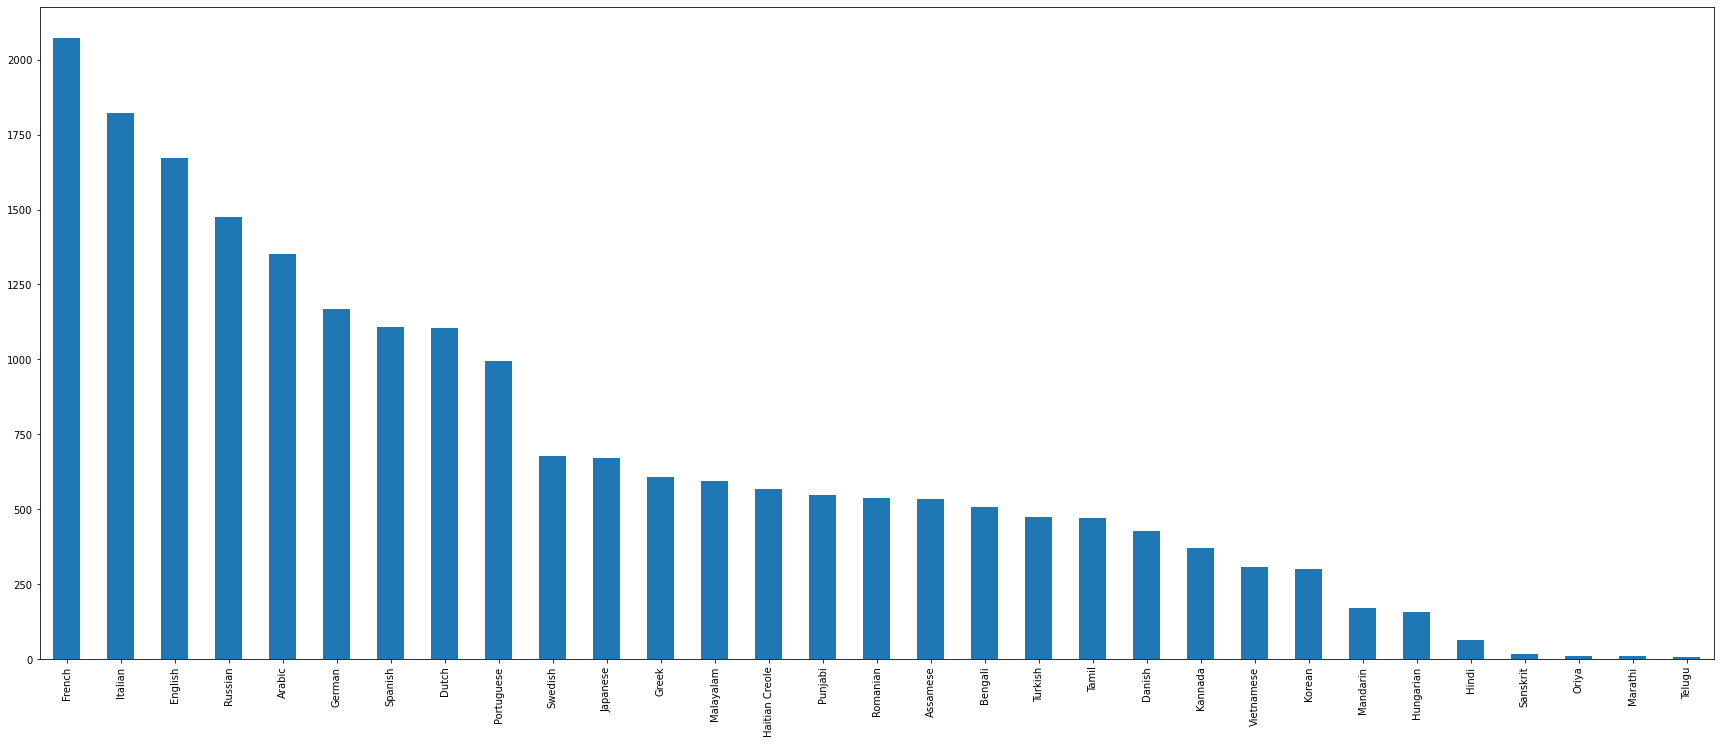

In [7]:
x =np.array(df['sentence'])
y= np.array(df['language'])
plt.figure(figsize=(30,12))
df.language.value_counts().plot(kind='bar');

In [8]:
c = CountVectorizer()
xmatrix = c.fit_transform(x)
xarray = xmatrix.toarray()
df = pd.DataFrame(data=xarray,columns = c.get_feature_names())
print(df)

       00  000  000க  001  001097666virtual  004  020  03  034  054  ...  \
0       0    0     0    0                 0    0    0   0    0    0  ...   
1       0    0     0    0                 0    0    0   0    0    0  ...   
2       0    0     0    0                 0    0    0   0    0    0  ...   
3       0    0     0    0                 0    0    0   0    0    0  ...   
4       0    0     0    0                 0    0    0   0    0    0  ...   
...    ..  ...   ...  ...               ...  ...  ...  ..  ...  ...  ...   
20787   0    0     0    0                 0    0    0   0    0    0  ...   
20788   0    0     0    0                 0    0    0   0    0    0  ...   
20789   0    0     0    0                 0    0    0   0    0    0  ...   
20790   0    0     0    0                 0    0    0   0    0    0  ...   
20791   0    0     0    0                 0    0    0   0    0    0  ...   

       ４人せきのテーブルでした  ４時にえいがをみませんか  ５かいと６かいにあります  ５人ですね  ５時か６時からならあいています  \
0           

In [9]:
freqs = list(zip(c.get_feature_names(), np.asarray(xmatrix.sum(axis=0)).ravel()))
print(sorted(freqs, key=lambda x: -x[1]))

[('de', 4129), ('la', 1951), ('the', 1724), ('en', 1706), ('que', 1578), ('in', 1522), ('of', 1167), ('un', 1127), ('wikipedia', 1001), ('and', 896), ('du', 875), ('di', 865), ('je', 845), ('to', 837), ('est', 812), ('te', 757), ('கள', 753), ('le', 741), ('is', 721), ('se', 666), ('et', 609), ('il', 582), ('ce', 496), ('da', 494), ('er', 484), ('el', 462), ('non', 454), ('che', 452), ('des', 451), ('ik', 448), ('es', 445), ('por', 440), ('att', 437), ('wikipédia', 433), ('les', 431), ('sie', 428), ('li', 427), ('det', 424), ('that', 423), ('vous', 420), ('no', 417), ('as', 404), ('het', 401), ('you', 400), ('في', 400), ('och', 387), ('una', 385), ('die', 384), ('for', 377), ('من', 370), ('para', 356), ('une', 347), ('een', 337), ('was', 335), ('ou', 334), ('kan', 330), ('som', 329), ('em', 327), ('at', 323), ('ich', 321), ('എന', 320), ('um', 314), ('si', 308), ('tu', 305), ('να', 303), ('om', 286), ('an', 285), ('är', 285), ('কৰ', 282), ('você', 279), ('den', 278), ('on', 277), ('dans'

C:\Users\Harneet\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2965 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Harneet\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Harneet\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2965 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Harneet\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2995 missing from current font.
  font.set_text(s, 0, flags=flags)


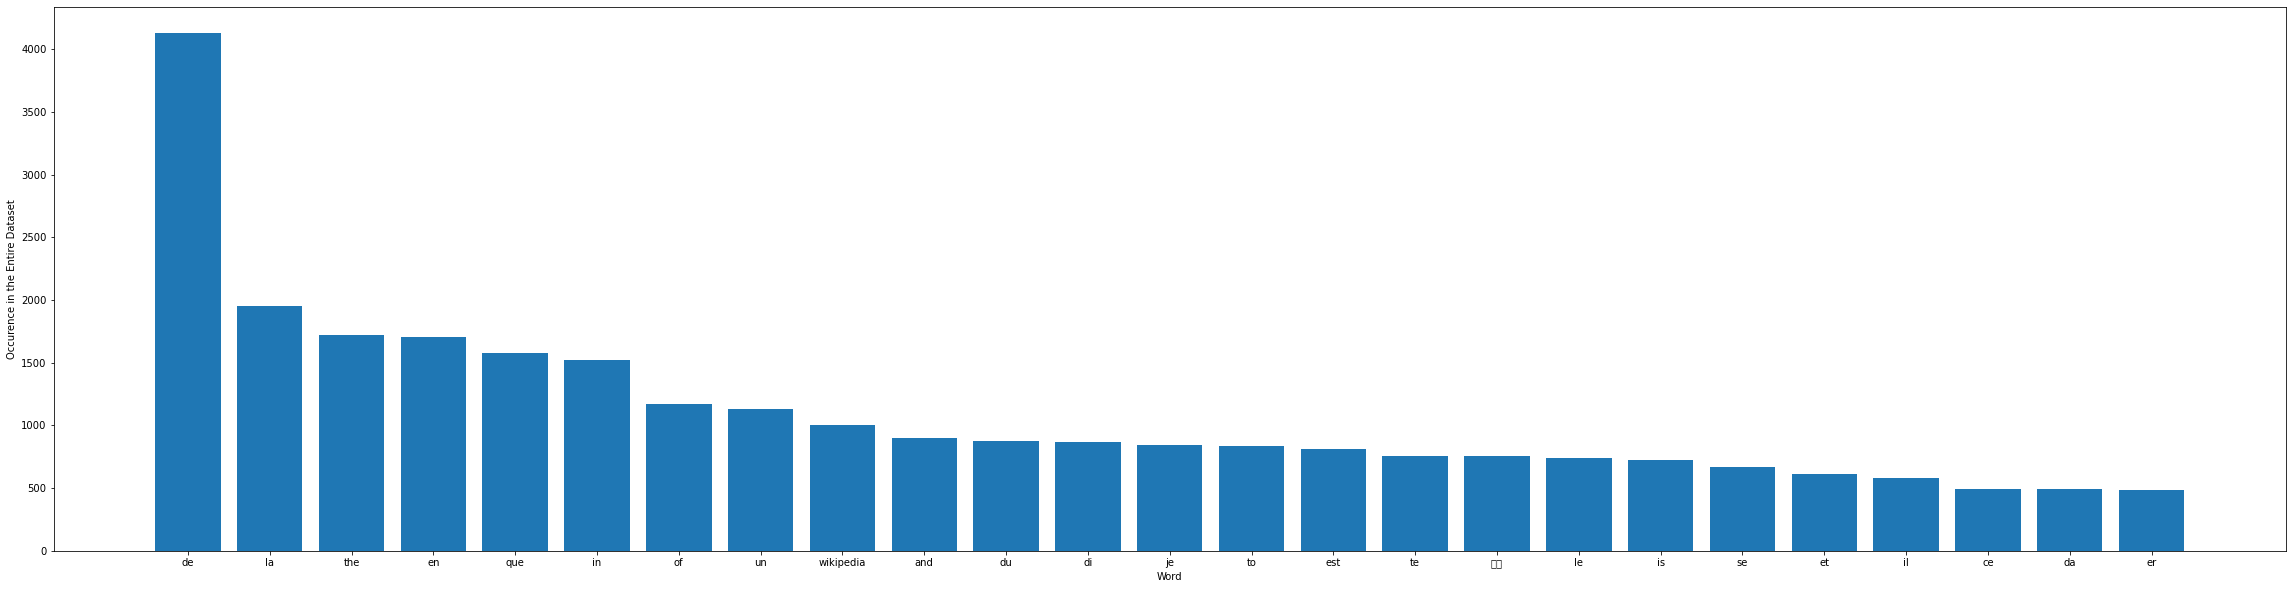

In [10]:
arr=pd.DataFrame(sorted(freqs, key=lambda x: -x[1]))
df = arr.head(25)
plt.figure(figsize=(40,10))
plt.bar(df[0], df[1])
plt.xlabel('Word')
plt.ylabel('Occurence in the Entire Dataset')
plt.show()

In [11]:
df.head()

,0,1
0,de,4129
1,la,1951
2,the,1724
3,en,1706
4,que,1578


# Model Building

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(xmatrix,y,test_size = 0.20)

In [13]:
accuracies=[]

# Multinomial Naive Bayes Classifier

In [14]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
text = ('Sono uno studente del college')
data = c.transform([text]).toarray()
print("Input Sentence:",end=" ")
print(text)
print("Predicted Language:", end=" ")
predlanguage=nb.predict(data)[0]
print(predlanguage)
print("Actual Language: Italian")
accuracies.append(["Multinomial Naive Bayes",nb.score(xtrain,ytrain)*100,nb.score(xtest,ytest)*100])

Input Sentence: Sono uno studente del college
Predicted Language: Italian
Actual Language: Italian


# Linear Support Vector Classifier

In [15]:
svc = LinearSVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)
text = ('Sono uno studente del college')
data = c.transform([text]).toarray()
print("Input Sentence:",end=" ")
print(text)
print("Predicted Language:", end=" ")
predlanguage=svc.predict(data)[0]
print(predlanguage)
print("Actual Language: Italian")
accuracies.append(["Linear SVC",svc.score(xtrain,ytrain)*100,svc.score(xtest,ytest)*100])

Input Sentence: Sono uno studente del college
Predicted Language: Italian
Actual Language: Italian


# Logistic Regression

In [16]:
lr = LogisticRegression(random_state=1)
lr.fit(xtrain,ytrain)
text = ('Sono uno studente del college')
data = c.transform([text]).toarray()
print("Input Sentence:",end=" ")
print(text)
print("Predicted Language:", end=" ")
predlanguage=lr.predict(data)[0]
print(predlanguage)
print("Actual Language: Italian")
accuracies.append(["Logistic Regression",lr.score(xtrain,ytrain)*100,lr.score(xtest,ytest)*100])

Input Sentence: Sono uno studente del college
Predicted Language: Italian
Actual Language: Italian


# Random Forest Classifier

error=[]
for i in range (60,80):
    rf = RandomForestClassifier(n_estimators=100, random_state=i)
    rf.fit(xtrain, ytrain)
    pred_i=rf.predict(xtest)
    error.append(np.mean(pred_i!=ytest))
plt.figure(figsize=(12,6))
plt.plot(range(60,80),error,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('Error rate vs random state values')
plt.xlabel('random state')
plt.ylabel('error')

In [17]:
rf=RandomForestClassifier(n_estimators=100, random_state=67)
rf.fit(xtrain,ytrain)
text = ('Sono uno studente del college')
data = c.transform([text]).toarray()
print("Input Sentence:",end=" ")
print(text)
print("Predicted Language:", end=" ")
predlanguage=rf.predict(data)[0]
print(predlanguage)
print("Actual Language: Italian")
accuracies.append(["Random Forest",rf.score(xtrain,ytrain)*100,rf.score(xtest,ytest)*100])

Input Sentence: Sono uno studente del college
Predicted Language: Italian
Actual Language: Italian


# K-Nearest Neighbours Classifier

error=[]
for i in range (0,10):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i=knn.predict(xtest)
    error.append(np.mean(pred_i!=ytest))
plt.figure(figsize=(12,6))
plt.plot(range(0,10),error,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('Error rate vs k values')
plt.xlabel('k values')
plt.ylabel('error')

In [18]:
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain,ytrain)
text = ('Sono uno studente del college')
data = c.transform([text]).toarray()
predlanguage=knn.predict(data)[0]
print("Input Sentence:",end=" ")
print(text)
print("Predicted Language:", end=" ")
print(predlanguage)
print("Actual Language: Italian")
accuracies.append(["K-Nearest Neighbours",knn.score(xtrain,ytrain)*100,knn.score(xtest,ytest)*100])

Input Sentence: Sono uno studente del college
Predicted Language: Telugu
Actual Language: Italian


# Decision Tree Classifier

In [19]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain, ytrain)
text = ('Sono uno studente del college')
data = c.transform([text]).toarray()
print("Input Sentence:",end=" ")
print(text)
print("Predicted Language:", end=" ")
predlanguage=lr.predict(data)[0]
print(predlanguage)
print("Actual Language: Italian")
accuracies.append(["Decision Tree Classifier",dt.score(xtrain,ytrain)*100,dt.score(xtest,ytest)*100])

Input Sentence: Sono uno studente del college
Predicted Language: Italian
Actual Language: Italian


# Evaluating the Models

In [20]:
sort_acc = sorted(accuracies, key=lambda x: x[2])
print (tabulate(sort_acc, headers=["Model Name", 
                                   "Training Accuracy", 
                                   "Testing Accuracy"]))

Model Name                  Training Accuracy    Testing Accuracy
------------------------  -------------------  ------------------
K-Nearest Neighbours                  52.0952             41.0195
Decision Tree Classifier              99.6513             82.3034
Random Forest                         99.6513             88.603
Logistic Regression                   97.4208             90.4063
Multinomial Naive Bayes               95.9779             92.955
Linear SVC                            99.5371             93.0753


In [21]:
text = ('Mi piacciono anche i cani, ma mi piacciono di più i gatti.') #italian
data = c.transform([text]).toarray()
predlanguage=svc.predict(data)[0]
print(predlanguage)

Italian


In [22]:
text = ('أنا أحب الكلاب أيضًا ، لكني أحب القطط أكثر.') #arabic
data = c.transform([text]).toarray()
predlanguage=svc.predict(data)[0]
print(predlanguage)

Arabic


In [24]:
text = ('es ist heute zu heiß, wir sollten Eis essen') #german
data = c.transform([text]).toarray()
predlanguage=svc.predict(data)[0]
print(predlanguage)

German


In [25]:
text = ('También me gustan los perros, pero me gustan más los gatos.') #spanish
data = c.transform([text]).toarray()
predlanguage=svc.predict(data)[0]
print(predlanguage)

Spanish


In [26]:
text = ('κάνει πολύ ζέστη σήμερα, πρέπει να φάμε παγωτό') #greek
data = c.transform([text]).toarray()
predlanguage=svc.predict(data)[0]
print(predlanguage)

Greek


In [39]:
text = ('ਕੀ ਇਹ ਤੁਹਾਡੇ ਨਾਲ ਗੱਲ ਕਰਨ ਦਾ ਚੰਗਾ ਸਮਾਂ ਹੈ') #punjabi
data = c.transform([text]).toarray()
predlanguage=svc.predict(data)[0]
print(predlanguage)

Punjabi


In [28]:
text = ('आज बहुत गर्मी है, हमें आइसक्रीम खानी चाहिए') #hindi
data = c.transform([text]).toarray()
predlanguage=svc.predict(data)[0]
print(predlanguage)

Hindi


In [37]:
text = ("J'adore les chats, les chats sont mes préférés") #french
data = c.transform([text]).toarray()
predlanguage=svc.predict(data)[0]
print(predlanguage)

French


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

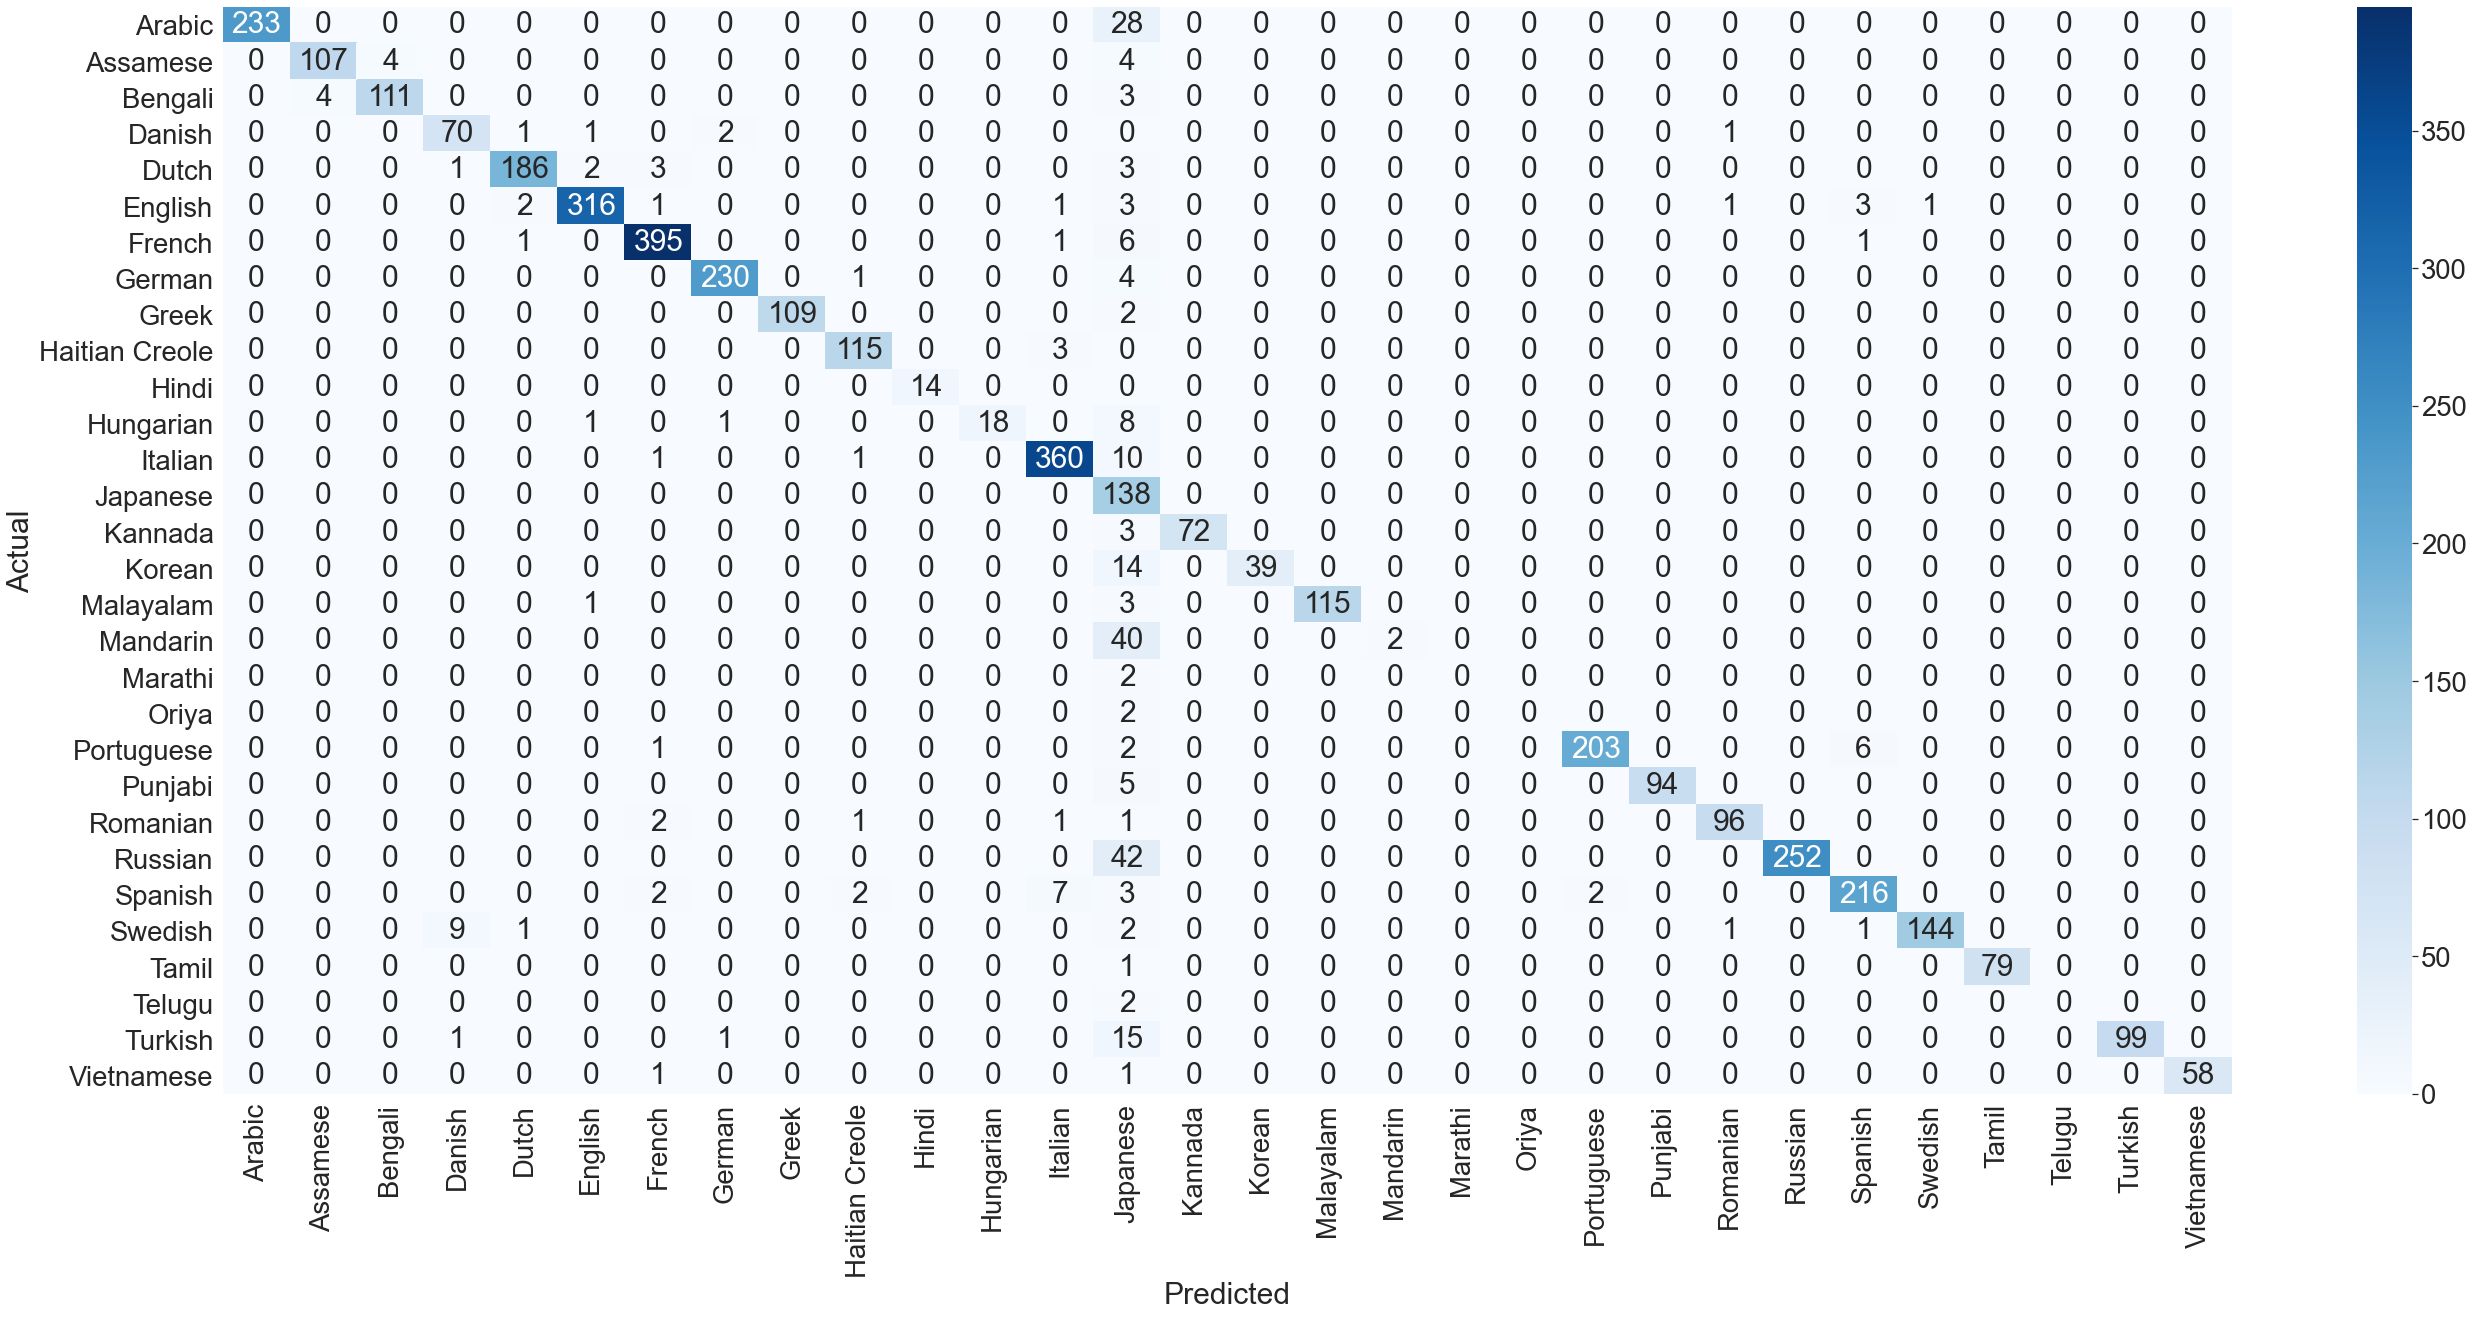

In [29]:
np.set_printoptions(linewidth=np.inf)
labels = np.unique(ytest)
data=confusion_matrix(ytest, ypred,labels=labels)
df_cm = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (45,20))
sns.set(font_scale=2.5)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 30}, fmt='g')

In [ ]:
text = ('input text here') #tryit
data = c.transform([text]).toarray()
predlanguage=svc.predict(data)[0]
print(predlanguage)